* 아래 내용은 아이펠학교 노드와 출처의 내용을 참고하여 작성했음을 밝힙니다.

# key word
전처리 분산표현 토큰화 BPE WPM WORD2VEC FAST TEXT ELMo

# 학습 목표

1. 분산표현에 대한 직관적 이해를 얻는다.
2. 문장 데이터를 정제하는 방법을 배운다.
3. 토큰화의 여러 가지 기법들을 배운다.
4. 단어 Embedding을 구축하는 방법에 대해 가볍게 맛본다.

# Lecture 1

# 1. 전처리: 자연어의 노이즈 제거

노이즈란? 맞춤법에 맞지 않는 표현 - 줄임말, 오타 등  

- 불완전한 문장으로 구성된 대화
- 문장 길이가 너무 길거나 짧은경우
- 문장 시간 간격이 긴경우 : 서로 말이 엊갈린경우, 늦게 답한 경우
- 바람직하지 않은 문장의 사용

**유형**

1) 문장 부호 :  문장부호 앞에 공백을 주어 처리한다.

2) 대소문자: lower 함수를 사용해서 모든 단어를 소문자 처리한다.

3) 특수문자: 알파벳과 기호를 정의해서 이를 제외하고 모두 제거한다.

##  노이즈 유형 (1) 문장 부호 :  문장부호 앞에 공백을 주어 처리한다

In [34]:
def pad_punctuation(sentence,punc):
    for p in punc:
        sentence = sentence.replace(p,""+p+"") #문장부호 양옆에 공백 추가
        
    return sentence

sentence = "Hi,my name is john."

print(pad_punctuation(sentence,[".","?","!",","]))

Hi,my name is john.


## 노이즈 유형 (2) 대소문자 : First, open the first chapter.

In [5]:
# 노이즈 유형 2
sentence = "Firta,open the first chapter"

print(sentence.lower())

firta,open the first chapter


In [6]:
sentence = "First, open the first chapter."

print(sentence.upper())

FIRST, OPEN THE FIRST CHAPTER.


## 노이즈 유형 (3) 특수문자 : He is a ten-year-old boy.


In [12]:
import re

sentence = "He is a ten-year-old boy."
sentence = re.sub("([^a-zA-Z.,?!])", " ", sentence)

print(sentence)

He is a ten year old boy.


In [13]:
# From The Project Gutenberg
# (https://www.gutenberg.org/files/2397/2397-h/2397-h.htm)

corpus = \
"""
In the days that followed I learned to spell in this uncomprehending way a great many words, among them pin, hat, cup and a few verbs like sit, stand and walk. 
But my teacher had been with me several weeks before I understood that everything has a name.
One day, we walked down the path to the well-house, attracted by the fragrance of the honeysuckle with which it was covered. 
Some one was drawing water and my teacher placed my hand under the spout. 
As the cool stream gushed over one hand she spelled into the other the word water, first slowly, then rapidly. 
I stood still, my whole attention fixed upon the motions of her fingers. 
Suddenly I felt a misty consciousness as of something forgotten—a thrill of returning thought; and somehow the mystery of language was revealed to me. 
I knew then that "w-a-t-e-r" meant the wonderful cool something that was flowing over my hand. 
That living word awakened my soul, gave it light, hope, joy, set it free! 
There were barriers still, it is true, but barriers that could in time be swept away.
""" 

def cleaning_text(text, punc, regex):
    # 노이즈 유형 (1) 문장부호 공백추가
    for p in punc:
        text = text.replace(p, " " + p + " ")

    # 노이즈 유형 (2), (3) 소문자화 및 특수문자 제거
    text = re.sub(regex, " ", text).lower()

    return text

print(cleaning_text(corpus, [".", ",", "!", "?"], "([^a-zA-Z0-9.,?!\n])"))


in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .  
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .  
some one was drawing water and my teacher placed my hand under the spout .  
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .  
i stood still ,  my whole attention fixed upon the motions of her fingers .  
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .  
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .  
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it

# 2. 분산표현 : 바나나와 사과의 관계를 어떻게 표현할까?

### 단어의 희소 표현과 분산 표현

(단어의 의미를 표현하는 접근 방식 차이)

1. 희소표현

= 희소 표현방식은 벡터의 각 차원마다 단어의 특정 의미 속성을 대응시키는 방식입니다

** 단어를 고차원 벡터로 변환한 것 = 단어를 숫자로 구체화해서 표현한것

**ex)** 사람의 성별을 표현하는 남자와 여자라는 두 단어를 수로 표현하려면 어떻게 하면 될까요? 

남자: [-1], 여자: [1]

다음으로 등장한 단어는 소년과 소녀입니다. 두 단어는 각각 어린 남자와 여자를 의미하니, 앞서 생성한 "성별"이라는 속성에 "나이가 어리다"라는 속성을 추가해야겠습니다. 

즉, 소년: [-1, -1], 소녀: [1, -1]

- 희소표현의 문제점

= 모든 단어의 속성을 표현하려면 고차원의 벡터가 필요하다.→불필요한 메모리와 연산량 낭비

= 희소표현의 워드벡터는 단어간 유사도를 계산할 수 없다.

즉, 희소표현한 단어는 의미를 공유하지 않는다.

❗대체방법: Embedding 레이어를 사용해 각 단어가 몇 차원의 속성을 가질지 정의하는 방식으로 단어의 분산 표현(distributed representation)를 구현

In [ ]:
# 100개의 단어를 256차원의 속성으로 표현
embedding_layer = tf.keras.layers.Embedding(input_dim=100, output_dim=256)

인간이 정의할 수 없는 추상적인 속성을 256 차원에 골고루 분산 →희소표현 처럼 속성값을 임의로 정하는 게 아니라 텍스트 데이터를 읽어가면서 적합한 값을 찾는 과정이다. 

### ❗단어 사전 구성과 활용의 문제

= 컴퓨터용 단어 사전을 구축해 두었지만, 정작 컴퓨터는 전혀 엉뚱한 단어로 해석하거나 혹은 사전에서 그 단어를 찾지 못해 당황하는 일이 생기게 됩니다. 그것은 바로 컴퓨터가 문장을 단어 단위로 정확하게 끊어 읽지 못하기 때문에 벌어지는 일입니다

# 3. 토큰화

문장을 어떤 기준으로 쪼갤때 쪼갠 단어를 토큰이라고 한다.

그 기준이 토큰화를 통해 정해진다. 

****토큰화 기법**

 1) 공백기반 토큰화

2) 형태소 기반 토큰화 

형태소: 예를 들어, 오늘도 공부만 한다 라는 문장이 있다면, 오늘, 도, 공부, 만, 한다 로 쪼개지는 것

**대표적인 분석기 2개: 특수한 문장(띄어쓰기 X / 오탈자) 처리 성능, 속도 측면에서 차이

- KoNLPy : 내부적으로 5가지의 형태소 분석 Class 포함
- kakao/khaii
- mecab : 가장 빠르다. 품질도 괜찮다
- 한나눔
- 꼬꼬마: 갯수가 많을수록 느리다
- KOMORAN: 자소 분리(띄어쓰기)나 오탈자에 대해서도 어느 정도 분석 품질이 보장

3) 사전에 없는 단어의 문제 

위에 두 기법 모두 의미 단위로 토큰 생성→ 상위 n개의 단어만 사용/나머지는 버린다

이로 인해 OOV문제 발생-새로 등장한 단어는 처리할 수 없는 오류가 발생! 모르는 단어가 등장하면 (사람도 마찬가지지만) 주어진 문제를 푸는 것이 어려워진다.

⬇️이 문제를 해결하기 위해 4번 한다.

# 4. Wordpiece Model-단어의 조각

### Byte Pair Encoding(BPE)

=데이터에서 가장 많이 등장하는 바이트 쌍(Byte Pair)을 새로운 단어로 치환하여 압축하는 작업을 반복하는 방식으로 동작

이 방법을 토큰화에 적용! 

모든 단어의 문자(바이트)를 집합으로 생각하고 자주 등장하는 문자쌍을 합치면 접두어와 접미어의 의미를 알 수 있고 처음 나온 단어는 문자의 조합으로 표현 가능 

문제: BPE 사전으로 모델을 학습하고 문장 생성해도 [i, am, a, b, o, y, a, n, d, you, are, a, gir, l]이라면, 어떤 기준으로 결합해서 문장 복원하지 알 수 없음!!

⬇️ 대안으로 제시 

### Wordpiece Model(WPM)

=한 단어를 여러 개의 Subword의 집합으로 보는 방법

- pre는 "미리, 이전의"라는 의미를 갖고 있다.
- pre+view & pre+dict 하나의 단어를 여러 서브워드로 분리해서 단어를 인코딩, 임베딩한다

**  WPM은 BPE에 대해 **두 가지 다른점**

1. 공백 복원을 위해 단어의 시작 부분에 언더바 _ 를 추가합니다.

= [_i, _am, _a, _b, o, y, _a, n, d, _you, _are, _a, _gir, l]로 토큰화

이때, 1) 모든 토큰을 합친 후, 2) 언더바 _를 공백으로 치환하면 알맞은 문장 만들어진다.

2. 빈도수 기반이 아닌 가능도(Likelihood)를 증가시키는 방향으로 문자 쌍을 합칩니다.

- LIKELIHOOD

= A에서 다른 문자B가 나올 확률 분포의 확률을 증가시킨다.(?)

❗하지만 WPM은 공개안됨!! 구글의 SentencePiece 라이브러리를 통해 고성능의 BPE를 사용 → OOV 발생 우려 없이 안정적으로 활용할 수 있는 멋진 토크나이징 기술을 확보

### ❗ 문제는 한국어에서 차 - 달리는 차, 마시는 차 구분할 수 없음 토큰들이 의미를 갖게 하는 방법 필요!

# 5. 토큰에게 의미를 부여하기

각 토큰들이 랜덤하게 부여된 실수로 살아가지 않게, 

그들끼리 유사도 연산을 할 수 있게 의미를 부여하는 알고리즘 3가지 !

### 1) Word2Vec

= 단어를 벡터로 만든다

"난 오늘 술을 한 잔 마셨어" 라는 문장의 각 단어 

즉, 동시에 등장하는 단어끼리는 연관성이 있다는 전제로 시작한 알고리즘이다. 

*****방식***

- CBOW: 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법입니다

    = {"The", "fat", "cat", "on", "the", "mat"}으로부터 sat을 예측하는 것은 CBOW가 하는 일

    - sat을 중심 단어(center word)라고 하고, 예측에 사용되는 단어들을 주변 단어(context word)
    - 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정했다면 이 범위를 윈도우(window)
    
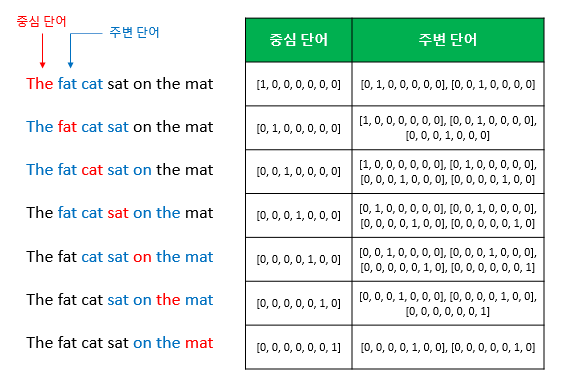

    * 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window)


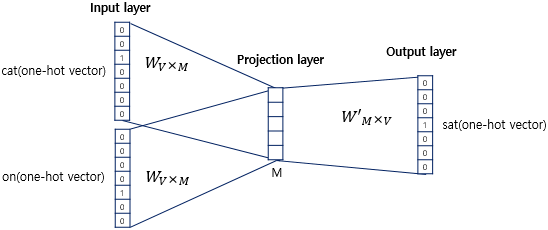

- 가운데를 투사층이라고 하며 연산이 이뤄진다. 중심단어를 예측하기 위해 주변 단어를 보는 방법임으로 주변단어들에서 평균을 구해서 예측한다.


   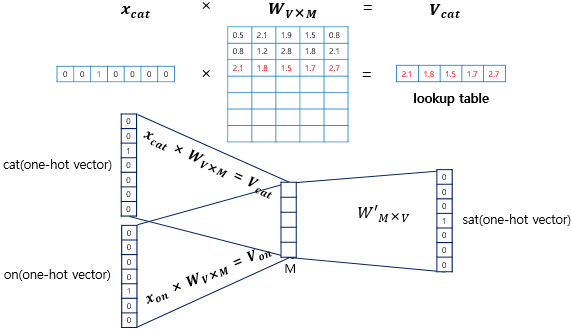

* 입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W 행렬의 곱

- Skip-gram: 중간에 있는 단어로 주변 단어들을 예측하는 방법입니다.

** Word2Vec은 딥러닝 모델이 아니다 → 은닉층이 1개라서 Shallow Neural Network라고 부른다.

출처:https://wikidocs.net/22660

### 2)FAST TEXT

= 한 단어를 n-gram의 집합이라고 보고 단어를 쪼개어 각 n-gram에 할당된 Embedding의 평균값을 사용하였다.

→ 기존에는 임베딩 벡터를 어휘마다 할당하고 학습했지만, 이제 어휘를 구성한 N-gram마다 임베딩 벡터를 할당하고 어휘를 구성한 모든 N-gram벡터의 평균을 어휘 임베딩으로 본다. 

- 🙋🏼‍♂️예시

    'where'을 fast text처리 하면 n=3 이라 가정하고 3-gram으로 자른다. 

    =<wh,whe,her,ere,re> -처음부터 순서대로 3개씩 잘라서 임베딩 벡터 할당 

    where의 임베딩 벡터 = 5개의 trigram에 대한 평균 벡터다. 

    ✅ 효과 

    -같은 의미를 갖는 단어가 문법 규칙에 따라 변하는 패턴 학습하기 쉽다.

    -같은 양의 텍스트에서 많은 정보를 활용한다.

    -학습하지 않은 단어(preview)도 n-gram으로 쪼개서 학습한 적 있으면 두 벡터를 조합해서 단어 만들 수 있다. (pre+view)

참고:[https://brunch.co.kr/@learning/7](https://brunch.co.kr/@learning/7)

### 3)  ELMo - the 1st Contextualized Word Embedding

❗고질적인 문제점 ❗

Word Embedding 알고리즘은 동의어를 처리할 수 없다 (고정적이다)

🙋🏼‍♂️예시 

- 이렇게나 탐스럽고 먹음직스러운 ***사과***를 보셨나요?
- 저의 간절한 ***사과***를 받아주시기 바랍니다.

= 두 문장의 "사과"의미가 다르다. 하지만, Word2Vec와 FastText는 두 문장에 나오는 사과의 워드 벡터값은 동일하다.

🤔 그럼 무엇이 필요할까? → Contextualized Word Embedding

문맥(context)의 활용이 필수적이다. 

즉, 단어의 의미벡터를 구하기 위해서는 그 단어만 필요한 것이 아니라 그 단어가 놓인 주변 단어 배치의 맥락이 함께 고려되는 Word Embedding이 필요한 것입니다

참고:[https://brunch.co.kr/@learning/12](https://brunch.co.kr/@learning/12)